# A Brief Introduction to SeaQuest Analysis in IPython
* ...or 'Jupyter', depending on your version
* Get data from MySQL
* Put it into Pandas DataFrames
* Give example of some common plotting and data manipulation
* Perform some EMC Ratio analysis in very little code

## Import some standard Python modules

In [83]:
import MySQLdb as mdb            # For MySQL connection handling
import numpy as np               # For efficient matrix math
import matplotlib.pyplot as plt  # For plotting purposes

# For graphs to display within the notebook
%matplotlib inline

## Pandas: PANel DAta manipulation and analysis
e.g. multidimensional time series and cross-sectional data sets commonly found in statistics, experimental science results, econometrics, or finance.

In [84]:
import pandas as pd              # High-level data structures and manipulation

## Pick a server

In [85]:
server = "seaquel.physics.illinois.edu"
port = 3283

## Select which production you'd like to study

In [86]:
production = 'merged_roadset57_R004_V005'

## A basic kDimuon selection query
* Valid dimuons from the target
* $\chi^2$ < 25
* mass between 4.2 and 10 GeV

In [87]:
dimuon_query = """
               SELECT spillID, dx, dy, dz, dpx, dpy, dpz,
                      mass, xF, xB, xT, px1, py1, pz1, 
                      px2, py2, pz2
               FROM kDimuon 
               WHERE isValid = 1
                 AND isTarget=1
                 AND chisq_dimuon < 25
                 AND mass BETWEEN 4.2 AND 10
               """

## Read it into a pandas DataFrame object
* Query the database, send results directly to DataFrame
* All field names and data types automatically understood
* Keep passwords secure! You can keep usernames and passwords in a config file
* Here's what my '.my.cnf' looks like:

```
[guest]
user = seaguest
password = XXXXXXXXXXX

[production]
user = production
password = XXXXXXXXXXX

[tracking]
user = tracking
password = XXXXXXXXXXX
```

In [6]:
%%time
dimuon_df = pd.DataFrame()
try:
    db = mdb.connect(read_default_file='./.my.cnf',    # Config file
                     read_default_group='guest',       # *Always* use guest permissions!
                     host=server,
                     port=port,
                     db=production)

    dimuon_df = pd.read_sql(dimuon_query, db)
    
    db.close()                                                   

except mdb.Error, e:
    print "MySQL Error [%d]: %s" % (e.args[0], e.args[1])        

CPU times: user 456 ms, sys: 160 ms, total: 616 ms
Wall time: 53.1 s


## Take a look at your data!

In [7]:
dimuon_df.head()

,spillID,dx,dy,dz,dpx,dpy,dpz,mass,xF,xB,xT,px1,py1,pz1,px2,py2,pz2
0,315771,0.314212,-0.238929,-150.967894,-1.310209,0.319232,70.009570,6.248694,0.329838,0.581296,0.310350,1.657724,-0.844212,50.327147,-2.967933,1.163444,19.682423
1,315765,0.136336,0.009279,-105.929454,0.185952,0.580127,67.490097,4.487948,0.438602,0.559311,0.162758,2.120983,1.252881,34.364782,-1.935032,-0.672754,33.125315
2,315764,-0.000427,-0.019179,-167.250402,-0.923947,-0.366566,76.452551,6.511901,0.412002,0.634505,0.302117,2.735217,0.358368,39.091286,-3.659164,-0.724934,37.361265
3,315762,-0.200729,0.022009,-114.927009,-0.825795,-0.077214,81.883683,4.544945,0.596247,0.678148,0.140408,1.222792,-1.197706,55.618341,-2.048587,1.120492,26.265343
4,315761,-0.152123,0.039204,-142.300715,-0.329818,1.273118,77.766127,4.745563,0.533757,0.644313,0.167281,1.946341,1.717244,42.846003,-2.276160,-0.444126,34.920125


In [8]:
dimuon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17314 entries, 0 to 17313
Data columns (total 17 columns):
spillID    17314 non-null int64
dx         17314 non-null float64
dy         17314 non-null float64
dz         17314 non-null float64
dpx        17314 non-null float64
dpy        17314 non-null float64
dpz        17314 non-null float64
mass       17314 non-null float64
xF         17314 non-null float64
xB         17314 non-null float64
xT         17314 non-null float64
px1        17314 non-null float64
py1        17314 non-null float64
pz1        17314 non-null float64
px2        17314 non-null float64
py2        17314 non-null float64
pz2        17314 non-null float64
dtypes: float64(16), int64(1)
memory usage: 2.4 MB


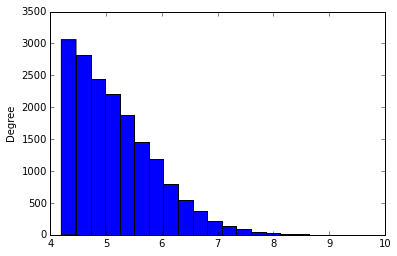

In [9]:
dimuon_df['mass'].plot(kind='hist', bins=20)

In [10]:
import seaborn as sns           # Make good looking plots easy
sns.set_context('poster')       # Contexts: paper, talk, notebook, poster

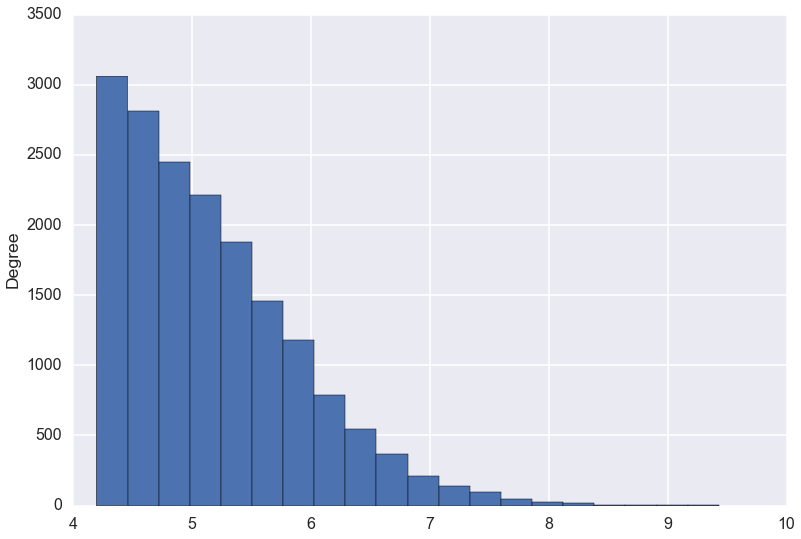

In [11]:
dimuon_df['mass'].plot(kind='hist', bins=20)

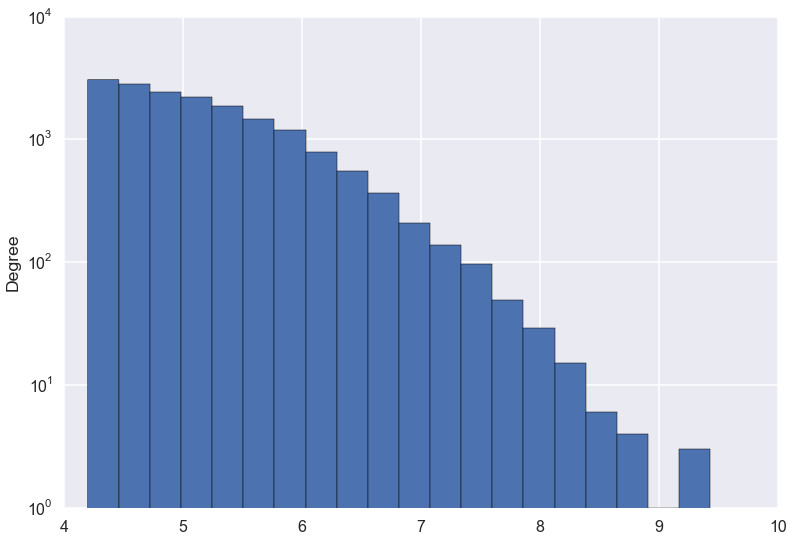

In [12]:
dimuon_df['mass'].plot(kind='hist', bins=20, logy=True)

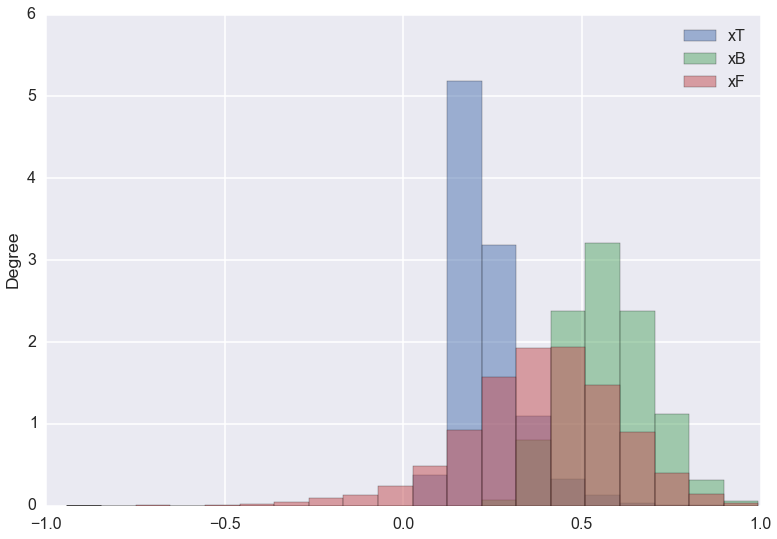

In [13]:
# Use plot() to plot fields together on one plot
# Use alpha option to set transparency
# Normalizing the histograms is an option
dimuon_df[['xT', 'xB', 'xF']].plot(kind='hist', alpha=0.5, bins=20, normed=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd191a50050>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd183741150>]], dtype=object)

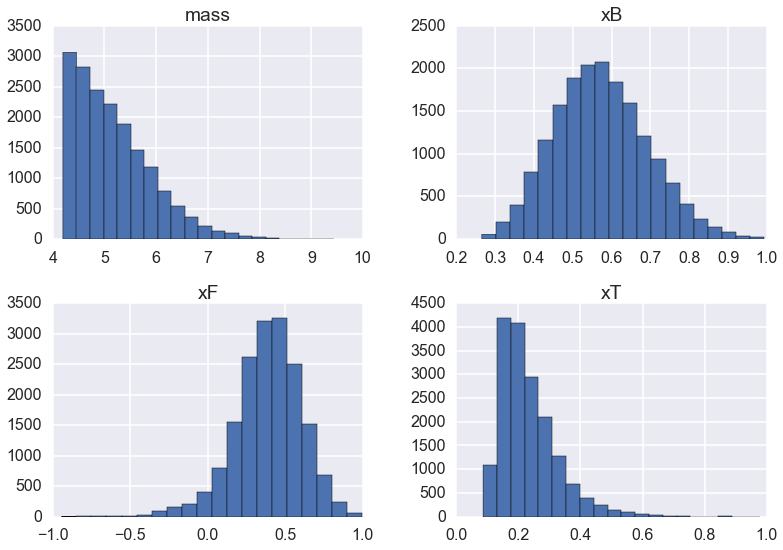

In [14]:
# Use other functions like hist() to show individual histograms
#    of the dataframe columns
dimuon_df[['mass', 'xT', 'xB', 'xF']].hist(bins=20)

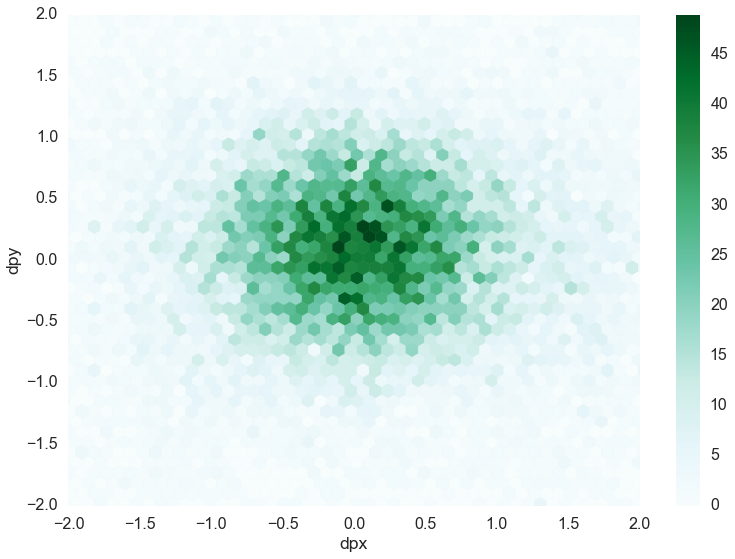

In [15]:
# Another 'kind' of built-in pandas plot, the hexbin plot
# (2-D heatmap, using hexagons instead of squares)
dimuon_df.plot(kind='hexbin', 
               x='dpx', y='dpy', 
               xlim=[-2,2], ylim=[-2,2], 
               sharex=False)

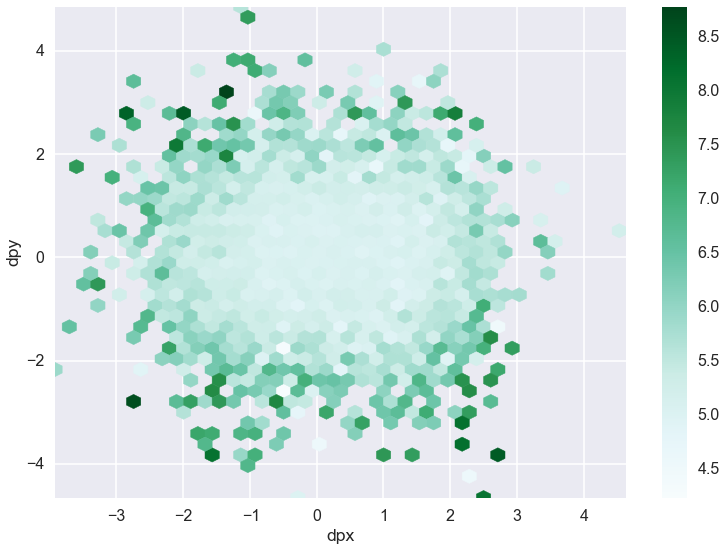

In [16]:
# Plot a certain value ("C value") at each (dpx,dpy).
# If you want to see the mean dpz at each dpz, dpy bin:
dimuon_df.plot(kind='hexbin', 
               x='dpx', y='dpy',
               C='mass',
               reduce_C_function=np.mean,
               gridsize=40,
               sharex=False)

## Feature Engineering
* You can easily and quickly add columns to existing data frames
* Also, as a bonus, data frames support LaTeX notation!

In [17]:
dimuon_df['$p_T$'] = np.sqrt( np.square(dimuon_df['dpx']) + np.square(dimuon_df['dpy']) )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd191a96c90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd181fb4b50>]], dtype=object)

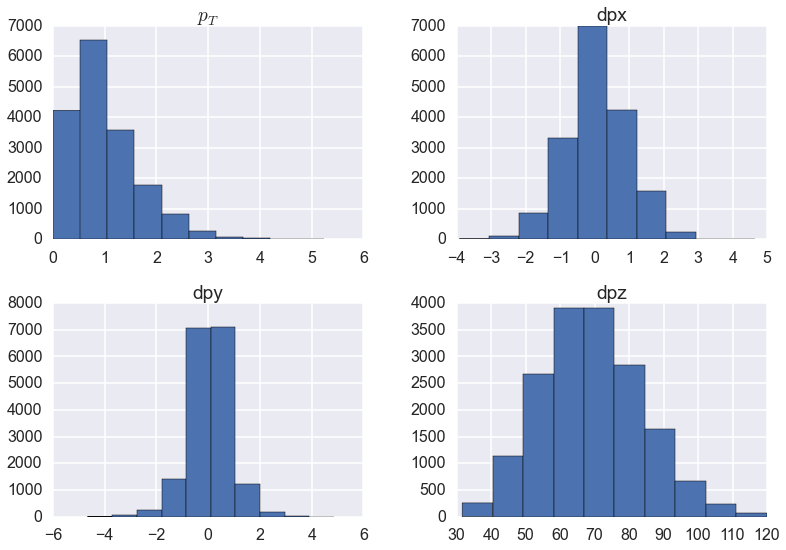

In [18]:
dimuon_df[['$p_T$', 'dpx', 'dpy', 'dpz']].hist()

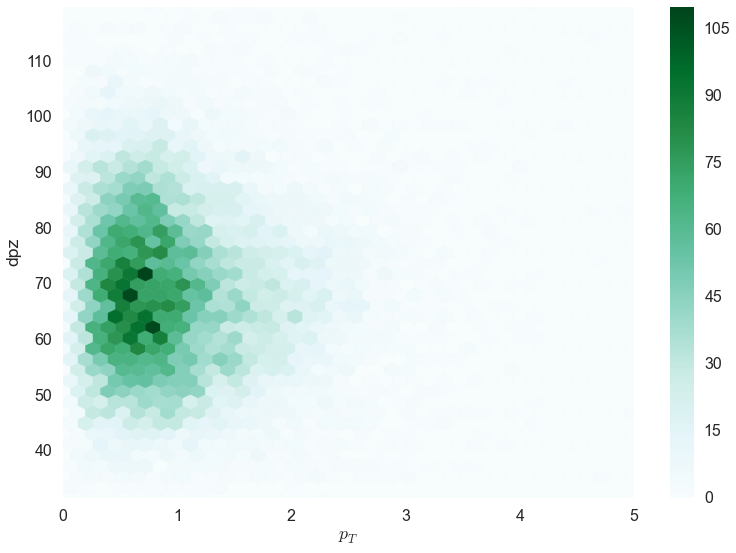

In [20]:
dimuon_df[['$p_T$', 'dpz']].plot(kind='hexbin',
                                 x='$p_T$', y='dpz',
                                 xlim=[0,5],
                                 gridsize=40,
                                 sharex=False)

# Scale It Up
* Use **ALL** merged productions
* Use only good spills
* Get targetPos field
* Get Live Proton count

## Select which productions you'd like to study

In [21]:
productions = ['merged_roadset57_R004_V005',
               'merged_roadset59_R004_V005',
               'merged_roadset62_R004_V005']

## The same query, excluding bad spills, and adding targetPos
* These results will be run for each merged production and concatenated together

In [22]:
dimuon_query_v2 = """
                  SELECT dx, dy, dz, dpx, dpy, dpz,
                      mass, xF, xB, xT, px1, py1, pz1, 
                      px2, py2, pz2, targetPos
                  FROM kDimuon
                    INNER JOIN Spill USING(spillID)
                  WHERE isValid = 1
                    AND isTarget=1
                    AND chisq_dimuon < 25
                    AND mass BETWEEN 4.2 AND 10
                    AND dataQuality = 0
                  """

## An example live proton sum query
* This will get the the live proton sum per target for a given merged production
* In *R005*, the spill-by-spill live proton calculation will be done for the user and provided in the Spill table
* This will be run for each merged production and then added together further on down

In [23]:
live_p_query = """
               SELECT targetPos,
                 SUM(value*(QIESum - trigger_sum_no_inhibit - inhibit_block_sum)/QIESum) AS `live_p`
               FROM BeamDAQ                                           
                 INNER JOIN Spill USING(spillID)                   
                 INNER JOIN Beam USING(spillID)                    
               WHERE name = 'S:G2SEM'
                 AND dataQuality = 0
                 AND Spill.runID IN (SELECT DISTINCT runID FROM kTrack)
               GROUP BY targetPos
               """

In [24]:
%%time
dimuon_df = pd.DataFrame()
live_p_df = pd.DataFrame()
try:
    db = mdb.connect(read_default_file='./.my.cnf',
                     read_default_group='guest',
                     host=server,
                     port=port)

    cur = db.cursor()
    
    for production in productions:
        
        cur.execute("USE %s" % production)
        
        temp_df = pd.read_sql(dimuon_query_v2, db)
        dimuon_df = pd.concat([dimuon_df, temp_df])
        
        temp_df = pd.read_sql(live_p_query, db, index_col='targetPos')
        if len(live_p_df) == 0:
            live_p_df = temp_df
        else:
            live_p_df += temp_df
    
    db.close()                                                   

except mdb.Error, e:
    print "MySQL Error [%d]: %s" % (e.args[0], e.args[1])        

CPU times: user 938 ms, sys: 252 ms, total: 1.19 s
Wall time: 1min 37s


In [25]:
dimuon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38690 entries, 0 to 19502
Data columns (total 17 columns):
dx           38690 non-null float64
dy           38690 non-null float64
dz           38690 non-null float64
dpx          38690 non-null float64
dpy          38690 non-null float64
dpz          38690 non-null float64
mass         38690 non-null float64
xF           38690 non-null float64
xB           38690 non-null float64
xT           38690 non-null float64
px1          38690 non-null float64
py1          38690 non-null float64
pz1          38690 non-null float64
px2          38690 non-null float64
py2          38690 non-null float64
pz2          38690 non-null float64
targetPos    38690 non-null int64
dtypes: float64(16), int64(1)
memory usage: 5.3 MB


In [26]:
# Get live protons in units of 10^16 live protons
live_p_df /= 1e16; live_p_df

,live_p
targetPos,
1,9.789947
2,1.566046
3,4.648281
4,1.851232
5,0.983039
6,2.489785
7,1.002651


## Keep data locally, for quick off-line analysis
* You can write to anything from excel files, CSV's, sqlite databases
* In a related note, you can also output your dataframe to HTML or LaTeX

In [27]:
# Write it all to CSV
dimuon_df.to_csv('seaquest_tutorial.csv')

In [28]:
# Load it back in from CSV at any time after!
dimuon_df = pd.read_csv('seaquest_tutorial.csv', index_col=0)

In [29]:
dimuon_df.head()

,dx,dy,dz,dpx,dpy,dpz,mass,xF,xB,xT,px1,py1,pz1,px2,py2,pz2,targetPos
0,0.314212,-0.238929,-150.967894,-1.310209,0.319232,70.009570,6.248694,0.329838,0.581296,0.310350,1.657724,-0.844212,50.327147,-2.967933,1.163444,19.682423,1
1,0.136336,0.009279,-105.929454,0.185952,0.580127,67.490097,4.487948,0.438602,0.559311,0.162758,2.120983,1.252881,34.364782,-1.935032,-0.672754,33.125315,1
2,-0.000427,-0.019179,-167.250402,-0.923947,-0.366566,76.452551,6.511901,0.412002,0.634505,0.302117,2.735217,0.358368,39.091286,-3.659164,-0.724934,37.361265,1
3,-0.200729,0.022009,-114.927009,-0.825795,-0.077214,81.883683,4.544945,0.596247,0.678148,0.140408,1.222792,-1.197706,55.618341,-2.048587,1.120492,26.265343,1
4,-0.152123,0.039204,-142.300715,-0.329818,1.273118,77.766127,4.745563,0.533757,0.644313,0.167281,1.946341,1.717244,42.846003,-2.276160,-0.444126,34.920125,3


In [30]:
print dimuon_df.head().to_latex()

\begin{tabular}{lrrrrrrrrrrrrrrrrr}
\toprule
{} &        dx &        dy &          dz &       dpx &       dpy &        dpz &      mass &        xF &        xB &        xT &       px1 &       py1 &        pz1 &       px2 &       py2 &        pz2 &  targetPos \\
\midrule
0 &  0.314212 & -0.238929 & -150.967894 & -1.310209 &  0.319232 &  70.009570 &  6.248694 &  0.329838 &  0.581296 &  0.310350 &  1.657724 & -0.844212 &  50.327147 & -2.967933 &  1.163444 &  19.682423 &          1 \\
1 &  0.136336 &  0.009279 & -105.929454 &  0.185952 &  0.580127 &  67.490097 &  4.487948 &  0.438602 &  0.559311 &  0.162758 &  2.120983 &  1.252881 &  34.364782 & -1.935032 & -0.672754 &  33.125315 &          1 \\
2 & -0.000427 & -0.019179 & -167.250402 & -0.923947 & -0.366566 &  76.452551 &  6.511901 &  0.412002 &  0.634505 &  0.302117 &  2.735217 &  0.358368 &  39.091286 & -3.659164 & -0.724934 &  37.361265 &          1 \\
3 & -0.200729 &  0.022009 & -114.927009 & -0.825795 & -0.077214 &  81.883683 &  4.544

# Brief EMC Ratio Analysis
* ...in just 10 cells

In [31]:
# Define some bin edges
bin_edges = [0.08, 0.14, 0.16, 0.18, 0.21, 0.25, 0.31, 0.53]

groups = dimuon_df.groupby(by=[dimuon_df.targetPos,            # Group by target position
                            pd.cut(dimuon_df.xT, bin_edges)])  # Cut into xT bins

In [32]:
df = groups.mean(); df.head()

dx        dy          dz       dpx       dpy  \
targetPos xT                                                                 
1         (0.08, 0.14]  0.026747  0.009990 -166.469007  0.062732  0.070766   
          (0.14, 0.16]  0.059215  0.016208 -162.047301  0.092030  0.068418   
          (0.16, 0.18]  0.041281  0.002948 -159.884238  0.081592  0.066893   
          (0.18, 0.21]  0.042087  0.008401 -156.519592  0.100057  0.047976   
          (0.21, 0.25]  0.174463 -0.005025 -152.786110  0.127287  0.060763   

                              dpz      mass        xF        xB        xT  \
targetPos xT                                                                
1         (0.08, 0.14]  87.770493  4.427398  0.663286  0.726710  0.125879   
          (0.14, 0.16]  77.681084  4.566365  0.548619  0.643477  0.150331   
          (0.16, 0.18]  72.800822  4.696842  0.485362  0.603279  0.170096   
          (0.18, 0.21]  69.819415  4.913634  0.436177  0.578817  0.194314   
          (0.21, 0.25]  66.791853  5.196724  0.375380  0.554053  0.228756   

                             px1       py1        pz1       px2       py2  \
targetPos xT                                                                
1         (0.08, 0.14]  1.960814  0.065145  44.931867 -1.898082  0.005621   
          (0.14, 0.16]  2.050897  0.087497  39.425464 -1.958867 -0.019079   
          (0.16, 0.18]  2.114659  0.059206  36.962837 -2.033068  0.007688   
          (0.18, 0.21]  2.202185  0.050805  34.880030 -2.102127 -0.002828   
          (0.21, 0.25]  2.325179  0.031266  33.409522 -2.197892  0.029497   

                              pz2  
targetPos xT                       
1         (0.08, 0.14]  42.838627  
          (0.14, 0.16]  38.255620  
          (0.16, 0.18]  35.837985  
          (0.18, 0.21]  34.939385  
          (0.21, 0.25]  33.382330

In [33]:
df['counts'] = groups.xT.count()
df[['xT', 'counts']].head()

xT  counts
targetPos xT                            
1         (0.08, 0.14]  0.125879    1047
          (0.14, 0.16]  0.150331    1208
          (0.16, 0.18]  0.170096    1304
          (0.18, 0.21]  0.194314    1823
          (0.21, 0.25]  0.228756    1981

### Uncertainty Tracking
* You could manually calculate uncertainties
* Python's uncertainties module has *ufloat* type (and *uarrays*, by extension)
* Seamless error propogation and tracking (keep tabs on correlated/uncorrelated)
* Redefine our 'counts' to include uncertainty of [+/- sqrt(counts)]

In [34]:
from uncertainties import unumpy as unp
df['counts'] = unp.uarray(df['counts'],np.sqrt(df['counts']))
df[['xT', 'counts']].head()

xT             counts
targetPos xT                                       
1         (0.08, 0.14]  0.125879          1047+/-32
          (0.14, 0.16]  0.150331          1208+/-35
          (0.16, 0.18]  0.170096  (1.30+/-0.04)e+03
          (0.18, 0.21]  0.194314  (1.82+/-0.04)e+03
          (0.21, 0.25]  0.228756  (1.98+/-0.04)e+03

### Counts per live proton

In [35]:
df['counts_norm'] = df['counts'] / live_p_df['live_p']
df[['xT','counts','counts_norm']].head()

xT             counts  counts_norm
targetPos xT                                                    
1         (0.08, 0.14]  0.125879          1047+/-32  106.9+/-3.3
          (0.14, 0.16]  0.150331          1208+/-35      123+/-4
          (0.16, 0.18]  0.170096  (1.30+/-0.04)e+03      133+/-4
          (0.18, 0.21]  0.194314  (1.82+/-0.04)e+03      186+/-4
          (0.21, 0.25]  0.228756  (1.98+/-0.04)e+03      202+/-5

In [36]:
# Let's make a new column for our live proton normalized counts with empty/none subtraction
df['cnt_nrm_bkg'] = None
# Subtract the Empty (targetPos=2) from LH2 and LD2 (targetPos 1 and 3)
df.loc[1,'cnt_nrm_bkg'] = df.loc[1,'counts_norm'].values - df.loc[2,'counts_norm'].values
df.loc[3,'cnt_nrm_bkg'] = df.loc[3,'counts_norm'].values - df.loc[2,'counts_norm'].values
# Subtract the None (targetPos=4) from Fe, C, and W (targetPos 5, 6 and 7)
df.loc[5,'cnt_nrm_bkg'] = df.loc[5,'counts_norm'].values - df.loc[4,'counts_norm'].values
df.loc[6,'cnt_nrm_bkg'] = df.loc[6,'counts_norm'].values - df.loc[4,'counts_norm'].values
df.loc[7,'cnt_nrm_bkg'] = df.loc[7,'counts_norm'].values - df.loc[4,'counts_norm'].values

df[['counts', 'counts_norm', 'cnt_nrm_bkg']].head()

counts  counts_norm cnt_nrm_bkg
targetPos xT                                                      
1         (0.08, 0.14]          1047+/-32  106.9+/-3.3      91+/-5
          (0.14, 0.16]          1208+/-35      123+/-4     107+/-5
          (0.16, 0.18]  (1.30+/-0.04)e+03      133+/-4     112+/-5
          (0.18, 0.21]  (1.82+/-0.04)e+03      186+/-4     161+/-6
          (0.21, 0.25]  (1.98+/-0.04)e+03      202+/-5     161+/-7

In [39]:
# Let's take some EMC ratios! Make a new field for the value
df['emc_ratio'] = None
# Target scale factors: density [atoms/cm^3] * length [cm] * mass number [nucleons/atom]
scale = { 1 : 4.221e22 * 49.087 * 1.008,
          3 : 4.835e22 * 48.002 * 2,
          5 : 8.491e22 * 1.801 * 55.845,
          6 : 9.035e22 * 3.209 * 12.011,
          7 : 6.322e22 * 0.9083 * 183.84
        }

# (LD2/scale(LD2))/(LH2/scale(LH2))
df.loc[3,'emc_ratio'] = np.divide(df.loc[3,'cnt_nrm_bkg'].values / scale[3],
                                  df.loc[1,'cnt_nrm_bkg'].values / scale[1])
# Subtract the None (targetPos=4) from Fe, C, and W (targetPos 5, 6 and 7)
df.loc[5,'emc_ratio'] = np.divide(df.loc[5,'cnt_nrm_bkg'].values / scale[5],
                                  df.loc[3,'cnt_nrm_bkg'].values / scale[3])
df.loc[6,'emc_ratio'] = np.divide(df.loc[6,'cnt_nrm_bkg'].values / scale[6],
                                  df.loc[3,'cnt_nrm_bkg'].values / scale[3])
df.loc[7,'emc_ratio'] = np.divide(df.loc[7,'cnt_nrm_bkg'].values / scale[7],
                                  df.loc[3,'cnt_nrm_bkg'].values / scale[3])

# Look at Iron
df.loc[5][['counts', 'counts_norm', 'cnt_nrm_bkg', 'emc_ratio']]

,counts,counts_norm,cnt_nrm_bkg,emc_ratio
xT,,,,
"(0.08, 0.14]",481+/-22,489+/-22,481+/-22,1.07+/-0.06
"(0.14, 0.16]",558+/-24,568+/-24,554+/-24,1.09+/-0.06
"(0.16, 0.18]",575+/-24,585+/-24,568+/-25,1.06+/-0.06
"(0.18, 0.21]",857+/-29,872+/-30,842+/-30,1.19+/-0.05
"(0.21, 0.25]",775+/-28,788+/-28,750+/-29,1.09+/-0.05
"(0.25, 0.31]",722+/-27,734+/-27,684+/-28,1.05+/-0.05
"(0.31, 0.53]",575+/-24,585+/-24,521+/-25,0.96+/-0.06


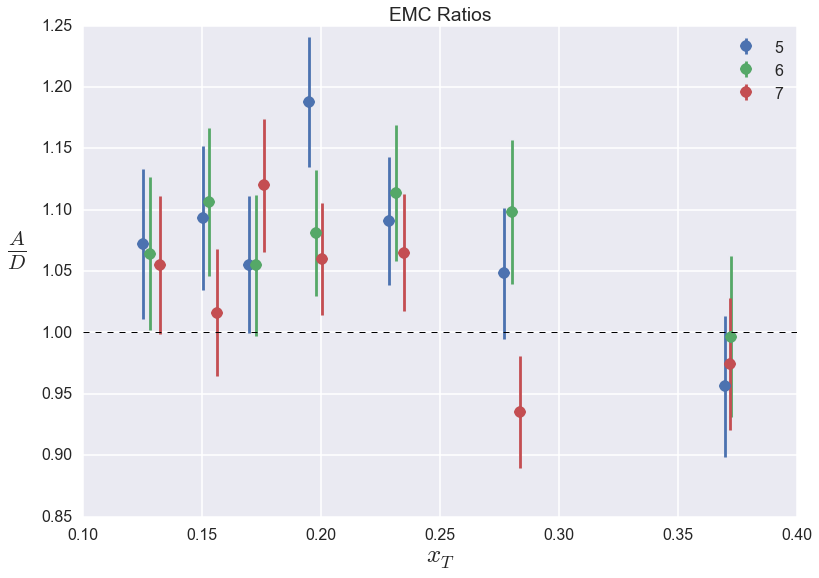

In [82]:
# Plot Iron's EMC effect
for i in [5,6,7]:
    x = df.loc[i]['xT'].values + ((i-5)*0.003)    # Add a slight offset factor
    y = df.loc[i]['emc_ratio'].values

    ynom = unp.nominal_values(y)
    yerr = unp.std_devs(y)

    plt.errorbar(x, ynom, yerr=yerr, fmt='o', label=i)

plt.axhline(y=1.0, c='k', ls='--', lw=1)
plt.legend(loc='best')
plt.xlabel("$x_T$", fontsize=25)
plt.ylabel("$\\frac{A}{D}$", fontsize=30, rotation=0, labelpad=25)
plt.title("EMC Ratios")

# Extra: Seaborn Plotting
* Not just aesthetics
* Many plotting and visualization tools
* See some good stuff in their [example gallery here](http://web.stanford.edu/~mwaskom/software/seaborn/examples/index.html)

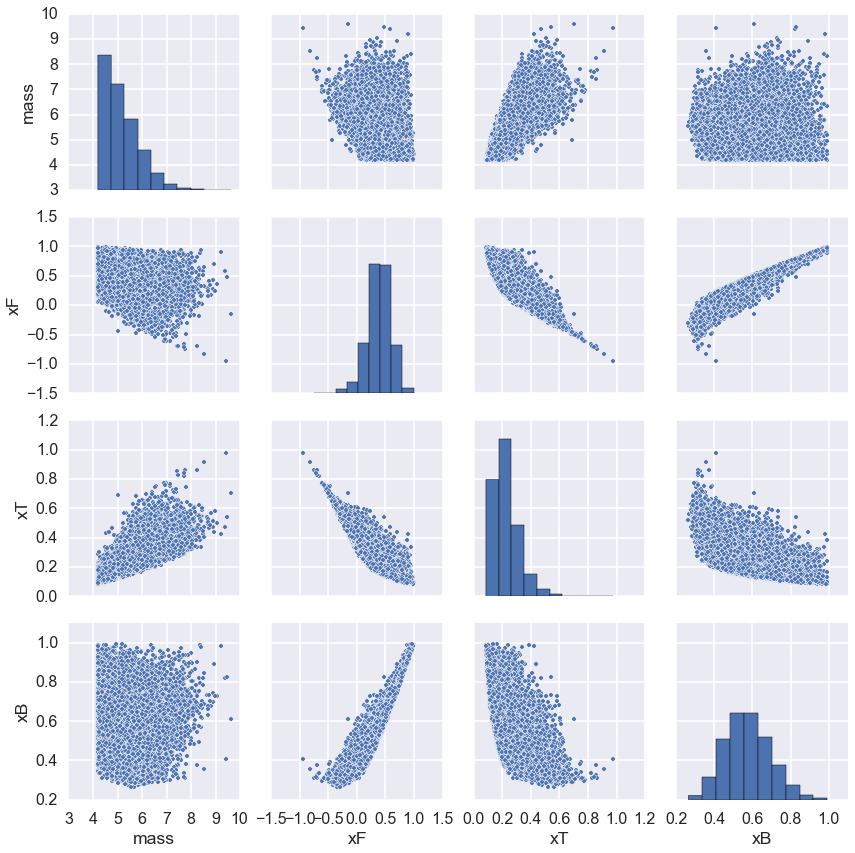

In [29]:
# PairPlot good for a quick peak at distributions
sns.pairplot(dimuon_df[['mass','xF','xT','xB']])

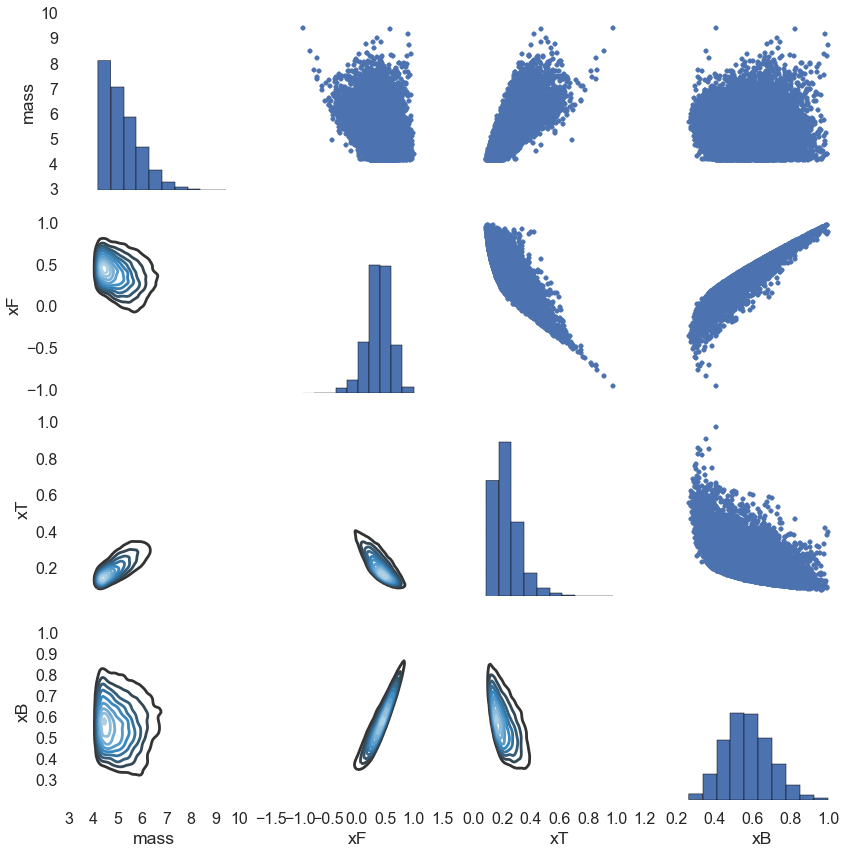

In [45]:
# Use PairGrid for finer control
# *Note*: kde plots take a bit longer to compute and plot
g = sns.PairGrid(dimuon_df[['mass','xF','xT','xB']])
g.map_upper(plt.scatter)                    # Upper off-diagonal components
g.map_lower(sns.kdeplot, cmap="Blues_d")    # Lower off-diagonal components
g.map_diag(plt.hist);                       # On-diagonal components

# A snippet of some target position analysis
Chuck pointed out that our rad monitors could indicate which target position we're using. Here, I make a query that 

1. Takes all 'G:RD3161' values
2. Scales them by a factor of 'S:G2SEM'/5e12 (scale to beam intensity)
3. Excludes spill ranges with manual target positioning and reversed FMAG/KMAG
4. Excludes bad spills


And then I plot this value's distribution for each target position to see if there are clear differences between targets

In [ ]:
beam_query = """
             SELECT spillID, `grd`/`g2sem` AS `value`, targetPos
             FROM 
                 (SELECT spillID, value AS `grd` FROM Beam WHERE name="G:RD3161") t1
                 INNER JOIN
                 (SELECT spillID, value/5e12 AS `g2sem` FROM Beam WHERE name="S:G2SEM") t2
                 USING(spillID)
                 INNER JOIN Spill USING(spillID)
             WHERE spillID NOT BETWEEN 416709 AND 424180
               AND spillID NOT BETWEEN 482574 AND 484924
               AND dataQuality = 0
             """
production = 'merged_roadset62_R004_V005'
try:
    db = mdb.connect(read_default_file='./.my.cnf',
                     read_default_group='guest',
                     host=server,
                     port=port,
                     db=production)

    beam_df = pd.read_sql(beam_query, db, index_col='spillID')
    
except mdb.Error, e:
    print "MySQL Error [%d]: %s" % (e.args[0], e.args[1]) 
    

(4, 10.5)

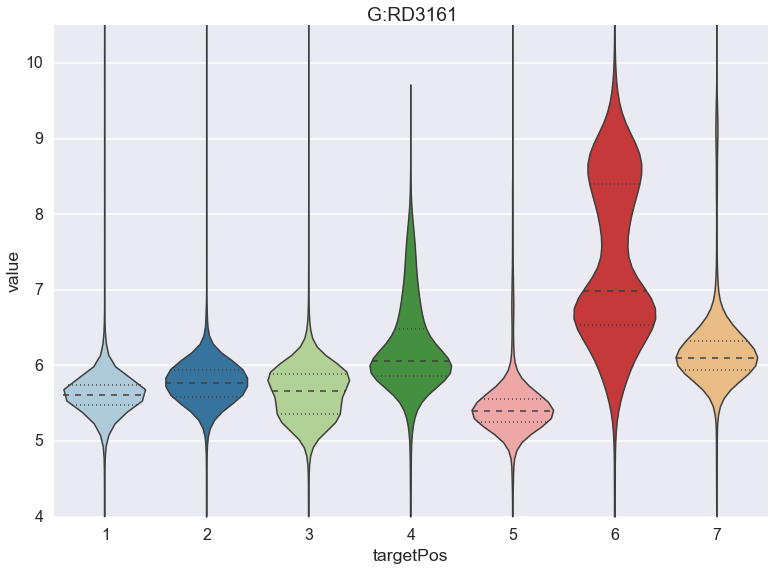

In [127]:
sns.violinplot(beam_df.value,
               beam_df.targetPos,
               color="Paired",
               bw=0.2)
plt.title("G:RD3161")
plt.ylim((4,10.5))